In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
files = glob.glob("./data/scan/2212131/*.csv")
print(files)

# file
dfs =[]
sample_names =[]
for file in files[:]:
    dfs.append(pd.read_csv(file, index_col=0))
    sample_names.append(file[-33:-4])

print(sample_names)
dfs[0].head()

['./data/scan/2212131\\2022-12-13-12-33-47_scan_SQ2110108.csv', './data/scan/2212131\\2022-12-13-12-37-11_scan_ST2110108.csv', './data/scan/2212131\\2022-12-13-16-12-55_scan_SB2110108.csv']
['12-13-12-33-47_scan_SQ2110108', '12-13-12-37-11_scan_ST2110108', '12-13-16-12-55_scan_SB2110108']


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,delay_pp_slow,delay_pp_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/12/13 12:32:20,28.974915,24.977570,566484.0,1183889.0,3849.247509,1007.365171,92.036972,13.952597,1.609850e+15,3.226436e+15,13.5,13.0
1,2022/12/13 12:32:23,28.854370,25.068359,536039.0,1187496.0,4364.522762,979.532134,169.647788,57.848266,1.609965e+15,3.226667e+15,13.5,13.0
2,2022/12/13 12:32:25,28.739929,25.137787,492703.0,1184251.0,4695.063720,900.446517,77.404115,105.585847,1.610081e+15,3.226898e+15,13.5,13.0
3,2022/12/13 12:32:27,28.591919,25.169830,444781.0,1178152.0,4962.687760,842.610590,54.208221,105.856754,1.610196e+15,3.227129e+15,13.5,13.0
4,2022/12/13 12:32:29,28.518677,25.281982,401587.0,1182123.0,5209.149455,793.208184,57.565950,117.216336,1.610311e+15,3.227360e+15,13.5,13.0


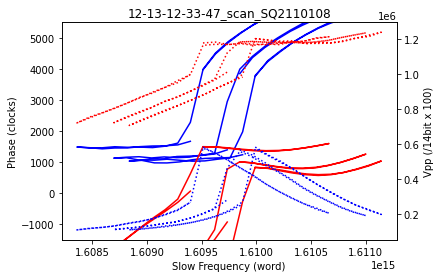

In [3]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

ax1.set_ylim(-1500,5500)


for df in dfs:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["vpp_sum1"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], color='r', linestyle="dotted")

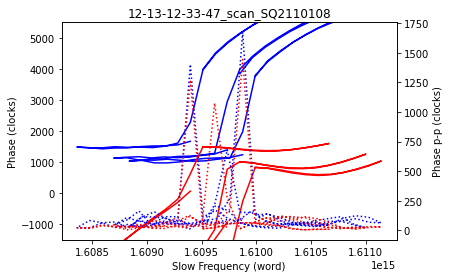

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Phase p-p (clocks)")
plt.title(sample_names[0])

ax1.set_ylim(-1500,5500)


for df in dfs:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["delay_pp_slow"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["delay_pp_fast"], color='r', linestyle="dotted")

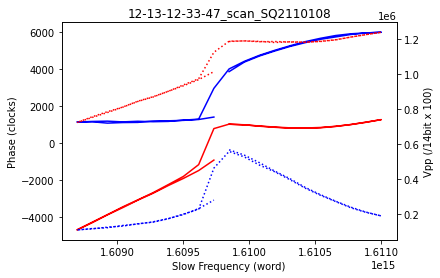

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])


for df in [dfs[0]]:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["vpp_sum1"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], color='r', linestyle="dotted")

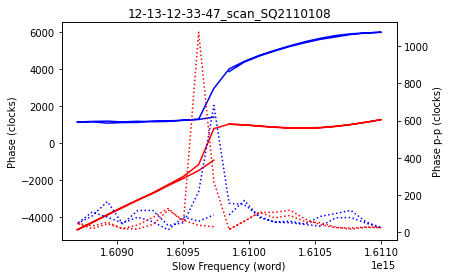

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Phase p-p (clocks)")
plt.title(sample_names[0])


for df in [dfs[0]]:
    ax1.plot(df["Ch1_word"], df["delay_slow"], color='b')
    ax1.plot(df["Ch1_word"], df["delay_fast"], color='r')
    ax2.plot(df["Ch1_word"], df["delay_pp_slow"], color='b', linestyle="dotted")
    ax2.plot(df["Ch1_word"], df["delay_pp_fast"], color='r', linestyle="dotted")

In [7]:
labels =["25deg", "15deg", "15deg", "35deg", "35deg", "25deg"]

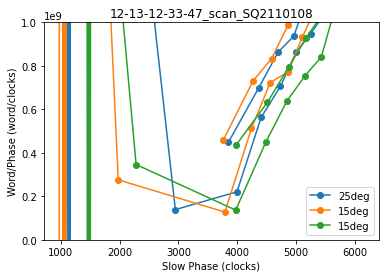

In [8]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Slow Phase (clocks)")
ax1.set_ylabel("Word/Phase (word/clocks)")
plt.title(sample_names[0])

ax1.set_ylim(0,1e9)

for i, df in enumerate(dfs):
    delta_slow = np.array([df["delay_slow"][i+1]-  df["delay_slow"][i] for i in range(len(df)-1)])
    delta_Ch2_word = np.array([df["Ch2_word"][i+1]-  df["Ch2_word"][i] for i in range(len(df)-1)])
    ax1.plot(df["delay_slow"][:-1], delta_Ch2_word/delta_slow, "-o", label=labels[i])
    
ax1.legend()


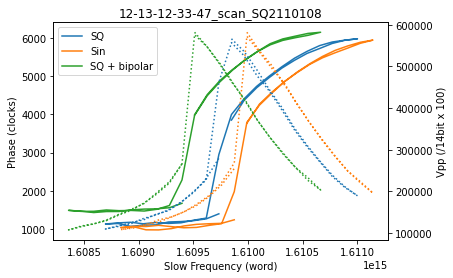

In [13]:
#labels =["0.49896","0.49856", "0.49865", "0.49871", "0.49880"]
labels =["SQ","Sin", "SQ + bipolar"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate(dfs[:]):
    ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    #ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()

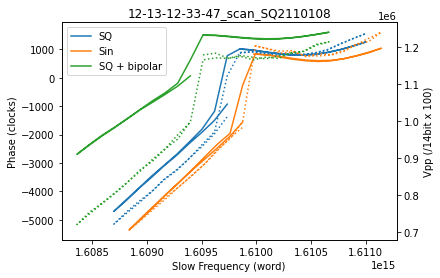

In [14]:
#labels =["0.49896","0.49856", "0.49865", "0.49871", "0.49880"]
labels =["SQ","Sin", "SQ + bipolar"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate(dfs[:]):
    #ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()

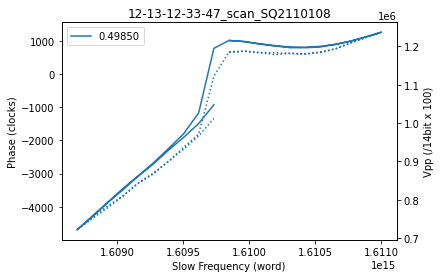

In [11]:
labels =["0.49850"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate([dfs[0]]):
    #ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()

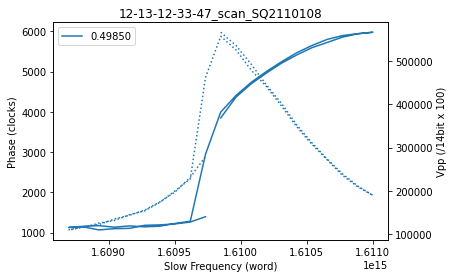

In [12]:
labels =["0.49850"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Slow Frequency (word)")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Vpp (/14bit x 100)")
plt.title(sample_names[0])

#ax1.set_ylim(-1500,5500)


for i, df in enumerate([dfs[0]]):
    ax1.plot(df["Ch1_word"], df["delay_slow"], label=labels[i])
    #ax1.plot(df["Ch1_word"], df["delay_fast"], label=labels[i])
    ax2.plot(df["Ch1_word"], df["vpp_sum1"],linestyle="dotted", label=labels[i])
    #ax2.plot(df["Ch1_word"], df["vpp_sum2"], label=labels[i], linestyle="dotted")
    
ax1.legend()